# Logistic regression numpy

Con scikit: `from sklearn.linear_model import LogisticRegression` 

## Dataset

Random clusters generated by `make blobs`. [Example of generated classification dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py)  

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html  

Logistic regression makes a binary classification prediction based on the sigmoid function with $n$ input features $x_1,...x_n$

$$ p = \frac{1}{1+e^{-(\beta_0+\beta_1x_1+...+\beta_nx_n)}} $$

The $\beta_i$ are coefficients that can be determined by SGD or other optimization. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from math import exp

plt.rcParams["figure.figsize"] = (10,2)

train.shape: (80, 3)
test.shape: (20, 3)


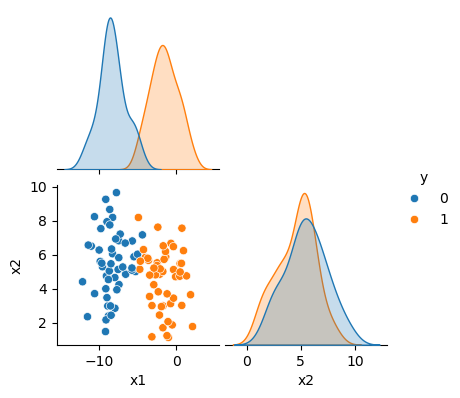

In [2]:
# Generate isotropic Gaussian blobs for clustering.
# Genrerar 2 clusters
features, label = make_blobs(n_samples=100, centers=2,\
                             n_features=2, random_state=7, cluster_std=1.8)
data = pd.DataFrame()
data['x1'] = features[:,0]
data['x2'] = features[:,1]
data['y']  = label
sns.pairplot(data,hue='y', height=2, corner=True)

# Split in train & test
train, test = train_test_split(data.values,test_size=0.2)
print(f"train.shape: {train.shape}")
print(f"test.shape: {test.shape}")

In [3]:
data

,x1,x2,y
0,-6.584920,4.848722,0
1,-8.291253,6.053016,0
2,-3.616170,5.666670,1
3,-5.294745,5.005431,0
4,0.498122,5.478702,1
...,...,...,...
95,-8.644430,7.745931,0
96,-8.826683,4.534990,0
97,-1.073137,2.063567,1
98,-7.784215,9.644047,0


In [4]:
# La sigmoid 
def sigmoid(x1, x2, beta):
    """ 
    Computes the Sigmoid function
    of the pair x1, x2 of the dataset 
    """
    t = beta[0] + beta[1]*x1 + beta[2]*x2
    return 1.0 / (1.0 + np.exp(-t))


Update the intercept $\beta_0$ con $\beta_0 = \beta_0 + LR(\epsilon)*p(1-p)$ and the 
feature coefficients $\beta_i$ with $\beta_i+LR(\epsilon)p(1-p)x_i$

Donde:  
* $LR$: Learning rate
* $\epsilon$: Simple difference (error) between the predicted value $p$ and the label $y$
* $x_i$: Input features

Coefficients: [1.8855397141092027, 1.7707216115192095, 1.6158281102759566]


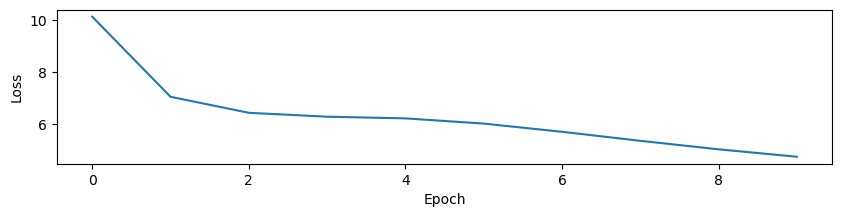

In [5]:
lr = 0.3 # Learning rate
epochs = 10

loss = np.zeros(epochs)
beta = [0.0,0.0,0.0]
for epoch in range(epochs):
    sum_error = 0
    for row in train:
        x1, x2, y = row[0], row[1], row[2] 
        p = sigmoid(x1, x2, beta)
        epsilon = y - p
        sum_error += epsilon**2
        beta[0] += lr * epsilon * p * (1.0 - p)
        beta[1] += lr * epsilon * p * (1.0 - p) * x1
        beta[2] += lr * epsilon * p * (1.0 - p) * x2
    loss[epoch] = sum_error

print(f"Coefficients: {beta}")
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Test the logistic regression model with the test data

In [6]:
yhat = []
for row in test:
    yhat.append(round(sigmoid(row[0], row[1], beta)))

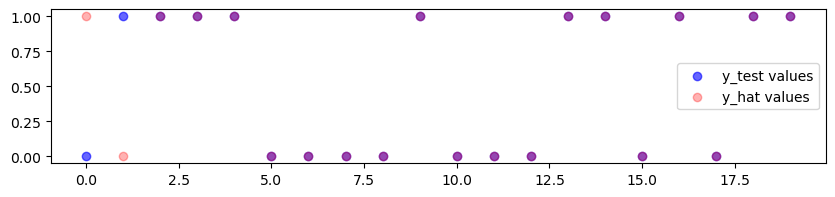

In [7]:
# Ver los resultados a simple vista
y_test = list(test[:,-1])
one_to_n = np.arange(len(yhat))
plt.scatter(x=one_to_n, y=y_test, color='blue', label='y_test values', alpha=.6)
plt.scatter(x=one_to_n, y=yhat, color='red', label='y_hat values', alpha=.3)
plt.legend()
plt.show()

<Axes: >

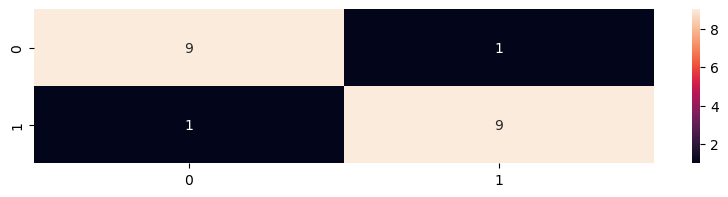

In [8]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,yhat)
sns.heatmap(cmat,annot=True)

In [9]:
np.column_stack([y_test,yhat])

array([[0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.]])